#  🧑‍⚕️💊 İlaç ve Vitamin Sınıflandırma Projesi 🩺 ⚕️

Merhaba,
bu proje, ilaç ve vitaminlerin görsel veriler üzerinden sınıflandırılmasını amaçlamaktadır. 
Sisteme bir ilaç veya vitamin resmi verildiğinde, hangi ilaç ya da vitamin olduğunu tahmin ederek kullanıcıya bilgi sunar. 
## 🔄 Projenin Akış Şeması 
1. Kütüphanelerin İçeri Aktarılması 
2. Verisetinin yüklenmesi ve İlk Analiz 
3. Verilerin Görselleştirilmesi
4. Veri Önişleme yapılması
5. Transfer Learning 
6. Fine Tuning
7. Model Değerlendirilmesi 


## 🔎 Neden Bu Proje?
- İlaç ve vitaminlerin birbirine benzemesi, yanlış kullanım riskini artırır.  
- Doğru ilacı/ vitamini tanımak, sağlık açısından kritik önem taşır.  
- Özellikle görme zorluğu yaşayan bireyler veya yaşlı kullanıcılar için faydalıdır.  
- Eczacılara, sağlık çalışanlarına ve son kullanıcılara pratik bir çözüm sunar.



# 🕮 Kütüphalerin Aktarımı
- Aşağıdaki kod  hücresinde kütüphanelerin içeri aktarımı yapılmıştır.
  
  - **NumPy**: Sayısal işlemler ve matris hesaplamaları için.  
  - **os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'**  kodu warning mesajlarını gizler.
  - **TensorFlow / Keras**: Derin öğrenme modellerini oluşturmak ve eğitmek için.
  - **scikit-learn**: Veri ön işleme ve performans ölçümleri için.  
  - **Matplotlib & Seaborn**: Eğitim süreci ve sonuçların görselleştirilmesi için.  
  - **OpenCV / PIL**: Görsel verilerin işlenmesi için.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers , models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense , Dropout
from keras.layers import LeakyReLU

from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model
from tensorflow.keras import layers

from pathlib import Path
import os.path

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split





# 🖥️ Verisetinin Yüklenmesi
- Aşağıdaki kod hücresinde veri setinin yüklenmesi yapılmaktadır.

   - Veriseti 10 sınıftan oluşmaktadır.
  
Veri setinde bulunan tüm görselleri tek bir listede toplamak için filepaths değişkeni oluşturulmuştur. Veri setindeki görseller farklı uzantılara sahip olabileceği için (`.jpg`, `.png`) her olası dosya yolu ayrı ayrı listelenmiş ve birleştirilmiştir.


In [4]:
dataset = "/kaggle/input/pharmaceutical-drugs-and-vitamins-synthetic-images/Drug Vision/Data Combined"
image_dir = Path(dataset)

filepaths =  list(image_dir.glob(r"**/*.jpg")) + list(image_dir.glob(r"**/*.png"))

# 🏷️Etiketlerin Çıkartılması
- Veri setindeki her resim dosyasının yolu `filepaths` listesine atama yapmıştık. 
Modelimizi eğitirken her resmin hangi sınıfa ait olduğunu bilmemiz gerekir.  
Bunu yapmak için aşağıdaki kod hücresinde, dosya yollarından **etiketler (labels)** çıkartılmaktadır.

In [5]:
labels= list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels


['DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'DayZinc',
 'Da

- **Aşağıdaki  kod hücresinde, model eğitimi için bu veriler tek bir tablo(image_df) hâline getirilmiştir.**

In [6]:
filepaths= pd.Series(filepaths, name = "filepath").astype(str)
labels=pd.Series(labels,name="label")
image_df = pd.concat([filepaths, labels], axis=1)

image_df

,filepath,label
0,/kaggle/input/pharmaceutical-drugs-and-vitamin...,DayZinc
1,/kaggle/input/pharmaceutical-drugs-and-vitamin...,DayZinc
2,/kaggle/input/pharmaceutical-drugs-and-vitamin...,DayZinc
3,/kaggle/input/pharmaceutical-drugs-and-vitamin...,DayZinc
4,/kaggle/input/pharmaceutical-drugs-and-vitamin...,DayZinc
...,...,...
9995,/kaggle/input/pharmaceutical-drugs-and-vitamin...,Bioflu
9996,/kaggle/input/pharmaceutical-drugs-and-vitamin...,Bioflu
9997,/kaggle/input/pharmaceutical-drugs-and-vitamin...,Bioflu
9998,/kaggle/input/pharmaceutical-drugs-and-vitamin...,Bioflu


# 🔬Verilerin Görselleştirilmesi
- Aşağıda ki kod hücresinde veri setinin görselleştirilmesi yapılmıştır.
  - Bir figür oluşturulmuştur. Bu figür içerisinde 4*4 lük bir matris oluşturulmuştur. Grid düzeni vardır ve bu grid düzeninin üzerinde 16 tane ilaç veya vitamin görüntüleri bulunmaktadır. **random_index= random** şekilde 16 görüntü seçer. 
**plt.tight_layout()** çizilen grafiklerde title, xlabel, ylabel, legend eğer birbirinin üstüne gelmemesi için kullanılır.

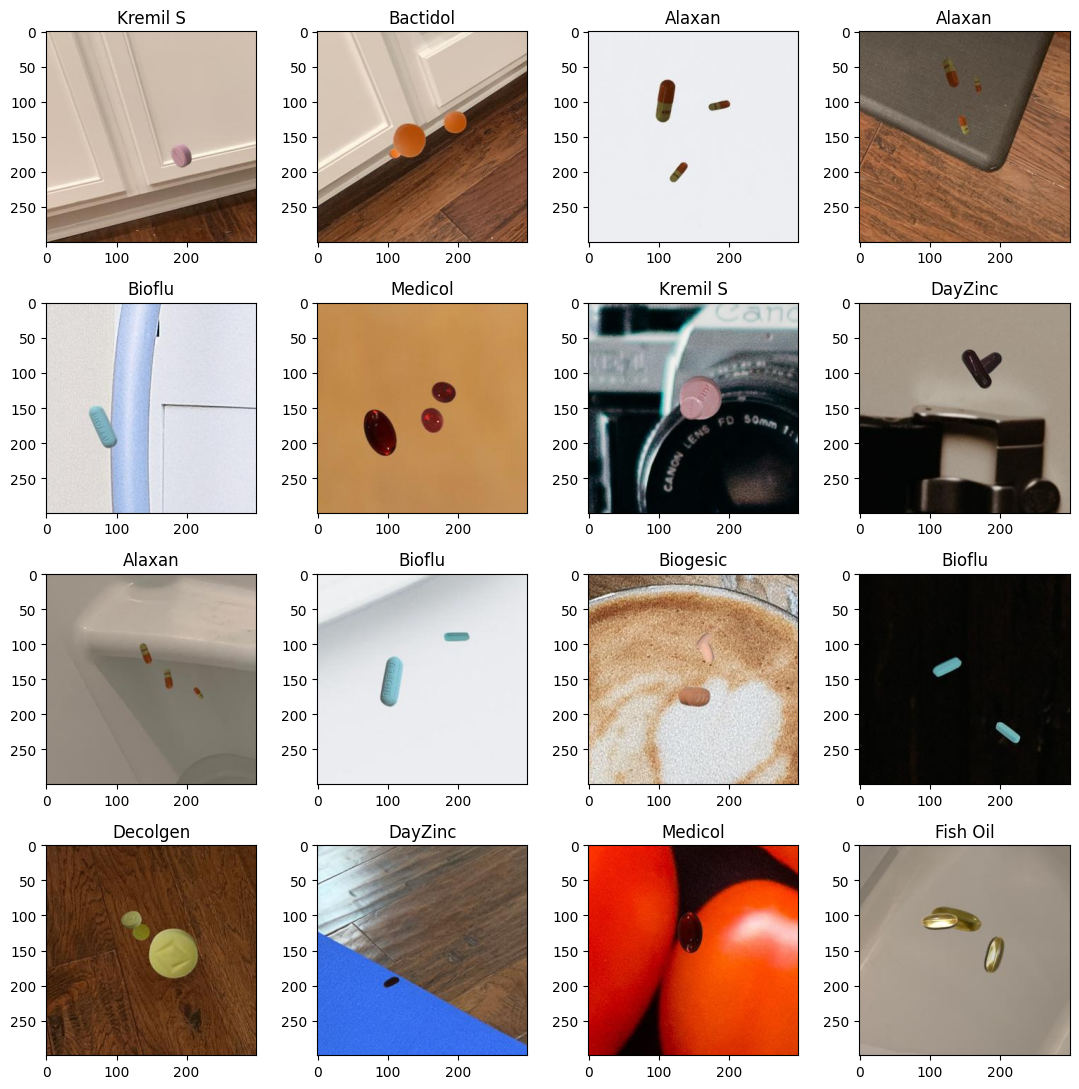

In [7]:
random_index= np.random.randint(0, len(image_df),16)
fig,axes= plt.subplots(nrows=4, ncols=4, figsize=(11,11))

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.filepath[random_index[i]]))
    ax.set_title(image_df.label[random_index[i]])
plt.tight_layout()

# 🛠️ Veri Önişleme 
Aşağıdaki kodda veri önişleme yapılmıştır. 
- Veri ön işleme adımlarında:
   - Train,test split
   - Veri artırma (rotation, zoom, flip) ,
   - Görsellerin yeniden boyutlandırılması,
   - Rescaling ile normalizasyon işlemleri uygulanmıştır. 

In [8]:
#Train_test split
train_df, test_df = train_test_split(image_df, test_size=0.2, shuffle=True, random_state=42)
train_df, test_df

#Data Augmentation
train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.8,1.2], 
    horizontal_flip=True,
    fill_mode='nearest'
)

test_generator=ImageDataGenerator(
                   preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

train_images= train_generator.flow_from_dataframe(
    dataframe= train_df,
    x_col ="filepath",
    y_col ="label",
    target_size = (224,224),
    color_mode = "rgb",
    class_mode= "categorical",
    batch_size=64,
    shuffle=True,
    seed=42,
    subset="training"
)

val_images= train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col ="filepath",
    y_col ="label",
    target_size = (224,224),
    color_mode = "rgb",
    class_mode= "categorical",
    batch_size=64,
    shuffle=True,
    seed=42,
    subset="validation"
)

test_images=test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col ="filepath",
    y_col ="label",
    target_size = (224,224),
    color_mode = "rgb",
    class_mode= "categorical",
    batch_size=64,
    shuffle=False, #test yaparken karıştırmaya gerek yoktur. 
)

#Resize and rescale
resize_and_rescale=tf.keras.Sequential(
    [
        layers.Resizing(224,224),
        layers.Rescaling(1./255)
    ])


Found 6400 validated image filenames belonging to 10 classes.
Found 1600 validated image filenames belonging to 10 classes.
Found 2000 validated image filenames belonging to 10 classes.


## 🌀 Kullanılan Model / Algoritma
- **Aşağıdaki kod hücresinde model tanımlanmıştır.**
Bu projede **CNN tabanlı bir derin öğrenme modeli** kullanılmıştır. Özellikle **MobileNetV2**, hafif ve hızlı yapısı sayesinde tercih edilmiştir; önceden ImageNet veri seti üzerinde eğitildiği için transfer öğrenme ile küçük veri setlerinde bile iyi sonuç verir.  
   - **pretrained_model.trainable = False** → Önceden öğrenilmiş katmanlar **donduruldu**, sadece eklediğimiz sınıflandırma bloğu eğitilecek. Bu, eğitim süresini kısaltır ve overfitting riskini azaltır.  

CNN mimarisi:  
- Convolution → Görsellerden öznitelik çıkarımı  
- Pooling → Boyut küçültme ve öznitelik yoğunlaştırma  
- Dense → 128 nöron + LeakyReLU + Dropout → sınıflandırma 
- Çıkış katmanı → 10 sınıf için softmax    

**Kendi tasarladığım katmanlar sayesinde, model veri setine daha uygun ve overfitting’e karşı dirençli hâle gelmiştir.**

Modelin çıktısı, yüklenen görselin **hangi sınıfa ait olduğunu tahmin eder.** 


In [10]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    include_top=False, #mobilenetin son sınıflandırma katmanını çıkartma
    weights="/kaggle/input/mobilenetv2/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top (2).h5",
    pooling= "avg"
)

pretrained_model.trainable= False 

#create checkpoint callback
checkpoint_path = "checkpoint.weights.h5"
checkpoint_callback= ModelCheckpoint(checkpoint_path,
                                    save_weights_only=True,
                                    monitor="val_accuracy",
                                    save_best_only=True)

early_stopping= EarlyStopping(monitor="val_loss",
                             patience=5, #5 epochta iyileşmezse 
                             restore_best_weights = True) #modelin en başarılı olduğu ağırlık

#training model -classification block (bunu kendim inşa ettim)
inputs = pretrained_model.input
x=resize_and_rescale(inputs)

x = Dense(128)(pretrained_model.output)
x = LeakyReLU(negative_slope=0.1)(x)
x = Dropout(0.5)(x)
#x=Dense(128, activation="relu")(x)
#x=Dropout(0.5)(x)
outputs= Dense(10, activation="softmax")(x)
model=Model(inputs=inputs, outputs=outputs)  



##  🤖 Modelin Eğitilmesi
- **Aşağıdaki kod hücresinde transfer learning ve fine tune adımı yapılmıştır.**
  - Model, 30 epoch boyunca eğitim seti üzerinde çalıştırılmıştır.
  - Eğitim sürecinde **loss** değerinin azalması ve **accuracy** değerinin artması gözlemlenmiştir.
  - Aşırı öğrenmeyi (overfitting) engellemek için erken durdurma (early stopping) ve dropout teknikleri kullanılmıştır.

In [14]:
import warnings
warnings.filterwarnings('ignore')

lr_schedule = ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=10000,
    decay_rate=0.9
)


model.compile(
    optimizer=RMSprop(learning_rate=lr_schedule),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)



history=model.fit(
    train_images,
    steps_per_epoch = len(train_images),
    validation_data= val_images,
    validation_steps=len(val_images),
    epochs=30,
    callbacks=[early_stopping, checkpoint_callback]
)



Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 303s 3s/step - accuracy: 0.1985 - loss: 2.3880 - val_accuracy: 0.5612 - val_loss: 1.5537
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 274s 3s/step - accuracy: 0.4332 - loss: 1.6471 - val_accuracy: 0.6625 - val_loss: 1.1812
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 275s 3s/step - accuracy: 0.5490 - loss: 1.3429 - val_accuracy: 0.7250 - val_loss: 0.9574
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 276s 3s/step - accuracy: 0.5919 - loss: 1.1901 - val_accuracy: 0.7487 - val_loss: 0.8367
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 279s 3s/step - accuracy: 0.6626 - loss: 1.0313 - val_accuracy: 0.7538 - val_loss: 0.7799
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 274s 3s/step - accuracy: 0.6697 - loss: 0.9624 - val_accuracy: 0.7738 - val_loss: 0.7253
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 281s 3s/step - accuracy: 0.7005 - loss: 0.9034 - val_accuracy: 0.7781 - val_loss: 0.6900
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 277s 3s/step - accuracy: 0.7099 - loss: 0.8571 - val_accu


# 📊Model Evaluation 
- **Aşağıdaki kod hücresinde,  eğitilmiş derin öğrenme modelimiz test verisi üzerinde değerlendirilmiştir.**  
`model.evaluate()` fonksiyonu, test verisini kullanarak modelin **kayıp (loss)** ve **doğruluk (accuracy)** değerlerini hesaplamıştır.

- **📉Test loss:** Modelin test verisi üzerindeki hata miktarını gösterir.  
- **🏆Test accuracy:** Modelin test verisindeki doğruluk oranını verir.



In [15]:
results=model.evaluate(test_images, verbose=1)
print("Test loss:", results[0])
print("Test accuracy:", results[1])



32/32 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8239 - loss: 0.4872
Test loss: 0.5026847720146179
Test accuracy: 0.8234999775886536


# 📈Model Graphical Evaluation📉
- **Aşağıdaki kod hücresinde modelin eğitim süreci grafiklerle görselleştirilmiştir.**  
**Amaç:** Eğitim ve doğrulama doğruluk (accuracy) ile kayıp (loss) değerlerini görerek modelin performansını değerlendirmek.


- **Accuracy (Doğruluk) Grafiği:**  
  Eğitim doğruluğu (Training Accuracy) 0’a yakın bir değerden başlayıp düzenli bir şekilde artarken, doğrulama doğruluğu (Validation Accuracy) 0.5–0.6 aralığından başlayıp artmakta ve bir süre sonra birbirine yakın bir seviyede sabitlenmektedir. Bu durum, modelin overfitting göstermediğini gösterir.  
  **Not:** Eğer validation accuracy, training accuracy’yi geçip aralarında büyük fark olsaydı, overfitting durumu olabilirdi!

- **Loss (Kayıp) Grafiği:**  
  Eğitim kaybı (Training Loss) başlangıçta yüksek değerlerden başlar ve düzenli olarak azalır. Doğrulama kaybı (Validation Loss) 1.4–1.6 aralığında başlayıp azalır ve sonunda eğitim kaybı ile birbirine yakın bir seviyede sabitlenir. Bu, modelin dengeli bir şekilde öğrendiğini ve overfitting olmadığını doğrular.  
  **Not:** Eğer validation loss, training loss’un çok üzerinde olsaydı veya tekrar yükseliyor olsaydı, model overfitting yapıyor olabilirdi!


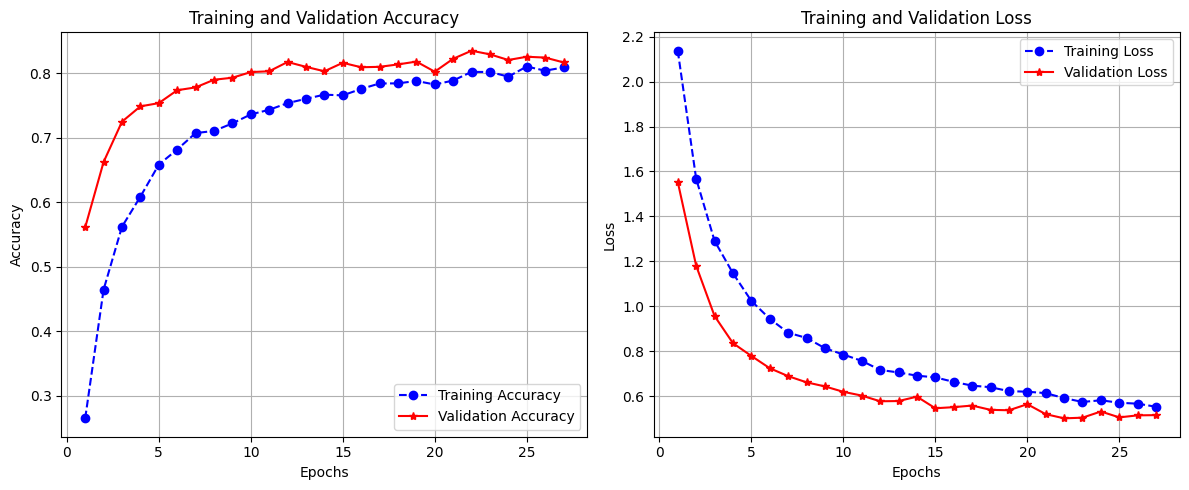

In [16]:
epochs=range(1,len(history.history["accuracy"])+1)
epochs
hist=history.history
plt.figure(figsize=(12,5))

# Accuracy grafiği
plt.subplot(1,2,1)
plt.plot(epochs,hist["accuracy"], "bo--", label= "Training Accuracy")
plt.plot(epochs,hist["val_accuracy"], "r*-", label= "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()

# Loss grafiği
plt.subplot(1,2,2)
plt.plot(epochs,hist["loss"], "bo--", label= "Training Loss")
plt.plot(epochs,hist["val_loss"], "r*-", label= "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 🎯 Model Tahminleri 
 - **Aşağıdaki kod hücresinde test verisi üzerinde model tahminleri yapılmış ve sonuçlar görselleştirilmiştir. Ayrıca sınıflandırma raporu ile modelin performansı detaylı olarak incelenmiştir.**

### Tahmin Çıktı Analizi
 - **Toplam Accuracy: 0.82→** Model, test setindeki örneklerin %82'sini doğru sınıflandırmış.

 - **Sınıf Bazlı Performans:**

      - En yüksek F1-score: Decolgen (0.90) → Model bu sınıfta oldukça başarılı.

      - En düşük F1-score: Biogesic (0.71) → Bu sınıfta tahminler daha zor olmuş.

 - **Precision ve Recall:** Genel olarak tüm sınıflarda dengeli, büyük fark yok.

 - **Macro ve Weighted Avg:** Hem ortalama hem ağırlıklı ortalamalar yaklaşık 0.82–0.83 → Model dengeli bir performans sergiliyor.

**Not: Eğer bazı sınıflarda precision yüksek ama recall çok düşük olsaydı, model bazı örnekleri fazla tahmin ederken diğerlerini atlıyor demek olurdu; şu an dengeli bir sonuç gözlemleniyor.**


In [ ]:
pred=model.predict(test_images)
pred=np.argmax(pred, axis=1)

labels=(train_images.class_indices)
labels=dict((v,k) for k,v in labels.items())
pred=[labels[k] for k in pred]
labels,pred

random_index= np.random.randint(0, len(test_df) -1,15)
fig,axes= plt.subplots(nrows=5, ncols=3, figsize=(11,11))

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.filepath[random_index[i]]))
    if test_df.label.iloc[random_index[i]]==pred[random_index[i]]:
        color="green"
    else:
        color="red"
    ax.set_title(f"True:{test_df.label.iloc[random_index[i]]}\n predicted: {pred[random_index[i]]}", color=color)
plt.tight_layout()

y_test=list(test_df.label)
print(classification_report(y_test, pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step
              precision    recall  f1-score   support

      Alaxan       0.73      0.86      0.79       202
    Bactidol       0.84      0.81      0.82       201
      Bioflu       0.85      0.88      0.87       175
    Biogesic       0.71      0.71      0.71       211
     DayZinc       0.86      0.78      0.82       208
    Decolgen       0.90      0.89      0.90       192
    Fish Oil       0.85      0.85      0.85       212
    Kremil S       0.76      0.82      0.79       186
     Medicol       0.94      0.91      0.93       209
      Neozep       0.82      0.73      0.77       204

    accuracy                           0.82      2000
   macro avg       0.83      0.82      0.82      2000
weighted avg       0.83      0.82      0.82      2000

